In [12]:
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [13]:
X_train = np.arange(0.0, 1.0, 0.1)
y_train = np.exp(np.sin(10*X_train))
X_train = X_train.reshape(-1, 1)

X_test = np.arange(0.01, 1.0, 0.01)
y_test = np.exp(np.sin(10*X_test))
X_test = X_test.reshape(-1, 1)

In [14]:
from squlearn import Executor
from squlearn.qelm import QELMRegressor

from squlearn.encoding_circuit import ChebyshevPQC, HubregtsenEncodingCircuit, ChebyshevTower

In [15]:
pqc = HubregtsenEncodingCircuit(10,1, num_layers=2)
exec = Executor()
qelm  = QELMRegressor(pqc,executor=exec, ml_model='linear',
                      num_operators=200, parameter_seed=1234)

In [16]:
qelm.fit(X_train, y_train)
y_pred = qelm.predict(X_test)

In [ ]:
# Step 6: Print the results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 7: Plot the predictions against the true values
plt.plot(X_test, y_test,'-', color='blue', label='True Values')
plt.plot(X_test, y_pred,'-', color='red', label='Predictions')
plt.plot(X_train, y_train, '-x',color='green', label='Training Set')
plt.plot(X_train, qelm.predict(X_train),'o', color='orange', label='Predictions Test')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('MLP Regressor Predictions vs True Values')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "parameter_seed" : [0,1,2,3],
    "num_operators" : [100,200,300],
    "num_qubits" : [2,3,4],
}

grid_search = GridSearchCV(estimator=qelm, param_grid=param_grid,
                           cv=5, n_jobs=1, verbose=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END num_operators=100, num_qubits=2, parameter_seed=0;, score=-955.948 total time=   0.2s
[CV 2/5] END num_operators=100, num_qubits=2, parameter_seed=0;, score=-1.456 total time=   0.1s
[CV 3/5] END num_operators=100, num_qubits=2, parameter_seed=0;, score=-0.292 total time=   0.1s
[CV 4/5] END num_operators=100, num_qubits=2, parameter_seed=0;, score=-2.683 total time=   0.1s
[CV 5/5] END num_operators=100, num_qubits=2, parameter_seed=0;, score=-3391.881 total time=   0.1s
[CV 1/5] END num_operators=100, num_qubits=2, parameter_seed=1;, score=-955.948 total time=   0.1s
[CV 2/5] END num_operators=100, num_qubits=2, parameter_seed=1;, score=-1.456 total time=   0.1s
[CV 3/5] END num_operators=100, num_qubits=2, parameter_seed=1;, score=-0.292 total time=   0.1s
[CV 4/5] END num_operators=100, num_qubits=2, parameter_seed=1;, score=-2.683 total time=   0.1s
[CV 5/5] END num_operators=100, num_qubits=2, parameter_se

Mean Squared Error: 0.3795567579693198
R^2 Score: 0.42550871398299317


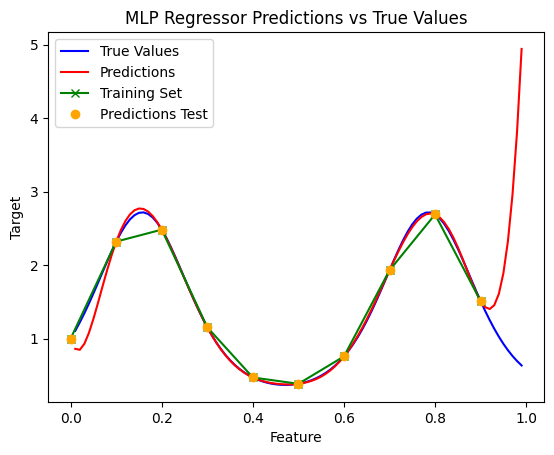

In [19]:
qelm.set_params(**grid_search.best_params_)

qelm.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = qelm.predict(X_test)

# Step 6: Print the results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 7: Plot the predictions against the true values
plt.plot(X_test, y_test,'-', color='blue', label='True Values')
plt.plot(X_test, y_pred,'-', color='red', label='Predictions')
plt.plot(X_train, y_train, '-x',color='green', label='Training Set')
plt.plot(X_train, qelm.predict(X_train),'o', color='orange', label='Predictions Test')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('MLP Regressor Predictions vs True Values')
plt.legend()
plt.show()